# Rock, paper, scissors in Julia

This is a simple agent-based model where $N$ individuals play Rock, Paper, Scissors in random pairs against each other. We have an updating rule, where the loser copies the strategy (rock, or paper, or scissors) from its opponent. We record the count of each strategy across time and finally plot this result. We can see the well-known cycles (as in predator-prey systems) that start to oscillate faster and faster till two strategies are lost and the population is fixed on a single strategy. 

In [9]:
# Load libraries
using StatsBase; # For sampling
using Plots; # For plotting

In [10]:
# Define functions
function compareStrategies(s, id)
    # In case they are differnt, do we have the Rock and Paper situation?
    if any(s.==1) & any(s.==3)
        return (id[s .== 3][], 1)
    # Otherwise the one with the higher valued strategy wins (looser adopts winning strategy
    else
        return (id[minimum(s)], maximum(s))
    end
end

compareStrategies (generic function with 1 method)

In [11]:
# Setting simulation parameters
N = 100; # Population size
R = 5*10^3; # Rounds to play
strategies = sample(1:3, N); # 1: Paper, 2: Scissors, 3: Rock

In [12]:
# Main simulation loop
record = zeros(Int, R, 3);
for i in 1:R
    # Record the number of players of each strategy
    record[i,:] = [sum(strategies.==1), sum(strategies.==2), sum(strategies.==3)]; 
    
    # Choose two random players by their ID
    identity = sample(1:N, 2, replace=false);
    
    # Select their respective stategies
    strategy = strategies[identity];
    
    # If not identical
    if strategy[1] != strategy[2]
        id_strategy = compareStrategies(strategy, identity)
        strategies[id_strategy[1]] = id_strategy[2];
    end
end
record


5000×3 Matrix{Int64}:
  33  34  33
  33  34  33
  33  34  33
  34  34  32
  35  34  31
  35  34  31
  34  35  31
  34  35  31
  34  35  31
  34  35  31
   ⋮      
 100   0   0
 100   0   0
 100   0   0
 100   0   0
 100   0   0
 100   0   0
 100   0   0
 100   0   0
 100   0   0

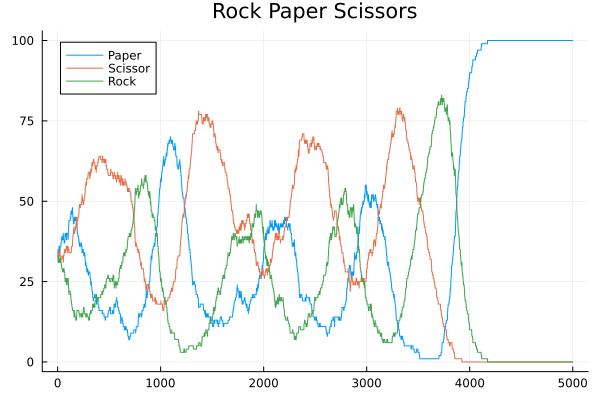

In [13]:
# Print the time series
paper = record[:,1];
scissor = record[:,2];
rock = record[:,3];
plot(1:R, [paper scissor rock], title="Rock Paper Scissors", label=["Paper" "Scissor" "Rock"])